
<img src="img/logo_wiwi.png" width="25%" align="left">

<img src="img/decision_analytics_logo.png" width="17%" align="right">



<br><br><br><br><br><br><br><br>



# Algorithmen und Datenstrukturen(A+D)-Projekt 

**Sommersemester 2025**


# 3. Rollout-Verfahren

<br>

<br>
<br>

**J-Prof. Dr. Michael Römer**

Juniorprofessur für Decision Analytics  | Universität Bielefeld

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Was machen wir heute?

- wir implementieren Rollout-Verfahren, die die "Kurzsichtigkeit" von Greedy-Verfahren überwinden
- wir stellen die Projektthemen vor und ordnen die Gruppen zu


**Beachte:** in diesem Notebook sind die Inhalte vom letzten Mal vorhanden, da wir den Code größtenteils für die neuen Inhalte benötigen


## TSP in Python: Distanzmatrix

- die einzige Information, die wir für die Darstellung des TSP brauchen, ist eine **Distanz-Matrix**
- in dieser (symmetrischen) Matrix steht in jedem Element $[i,j]$ die Distanz zwischen den Knoten (Orten) $i$ und $j$
- als Beispiel betrachten wir folgende Matrix:


In [56]:
distance_matrix = np.array([
    [0,  5, 4, 10],
    [5,  0, 8,  5],
    [4,  8, 0,  3],
    [10, 5, 3,  0]
])

## Hilfsfunktion: `select_nearest_neighbor`

- wir lagern die Bestimmung des nächsten Nachbarn aus in eine eigene Funktion


In [51]:
def select_nearest_neighbor(distance_matrix, tour):
    
    # node ist der letzte Knoten der tour
    node = tour[-1]
    
    smallest_distance = 9999999999 ## grosser Wert
    nearest_neighbor = 0
    
    alle_knoten = range(len(distance_matrix))
    
    #Anzahl an Knoten = Dimension der Distanzmatrix
    for neighbor in alle_knoten:
        
        if neighbor in tour: # bereits besuchte Knoten werden nicht berücksichtigt
            continue
            
        if distance_matrix[node][neighbor] < smallest_distance:
            nearest_neighbor = neighbor
            smallest_distance = distance_matrix[node][neighbor]            
       
    return nearest_neighbor, smallest_distance 

- probieren wir es aus!

In [53]:
tour = [0,2,3,1]


nearest_neighbor, smallest_distance = select_nearest_neighbor(distance_matrix, tour)

print ("nearest neighbor:", nearest_neighbor, " with distance: ", smallest_distance)

nearest neighbor: 6  with distance:  45


## Implementierung des Nearest-Neighbor-Algorithmus

- beachte: der zweite Parameter ist die eine ein-elementige Liste (die den Startknoten enthält)

In [54]:
 
def tsp_nearest_neighbor(distance_matrix, tour):
    
    total_distance = 0
    
    #solange die sequenz noch nicht alle Knoten umfasst
    while len(tour) < len(distance_matrix):
        
        node, distance = select_nearest_neighbor(distance_matrix, tour)
        
        tour.append(node)
        
        total_distance += distance
        
    total_distance += distance_matrix[tour[-1], tour[0]]
    return tour, total_distance


..probieren wir es aus:

In [61]:
startknoten = 0
tour, distance = tsp_nearest_neighbor(distance_matrix, [startknoten])
print("Tour", tour, "with distance", distance)

Tour [0, 2, 3, 1] with distance 17


## Eine Routine zum Evaluieren einer Lösung

- immer wenn man nicht-triviale Algorithmen für Optimierungsprobleme entwickelt, sollte man einen "Solution-Checker" schreiben / nutzen

><div class="alert alert-block alert-info">
<b>Was ist im Fall des TSP zu prüfen?</b></div>  


**Im Fall des TSP gilt es:**
- zu prüfen, ob
  - die Lösung die Richtige Anzahl an Knoten enthält
  - dass es sich bei der Lösung tatsächlich um eine Permutation der Indizes handelt (kein Index kommt zweimal vor)
- die Distanz der Tour zu berechnen

In [8]:
def evaluate_tsp_solution(distance_matrix, tour):
    n = len(distance_matrix)
    if len(tour) != n:
        print ("Wrong number of nodes")
        return -1
    
     # Menge der Lösungsindizes muss = der Menge der Indizes von 0 bis n-1 sein
    if set(tour) != set(range(n)):
        print ("Not a proper tour!")
        return  -1
    
    total_distance = 0
    for i in range(n):
        if i < n-1:
            total_distance += distance_matrix[tour[i],tour[i+1]]
        else:
            total_distance += distance_matrix[tour[i],tour[0]]   
            
    return total_distance    

...probieren wir es aus:

In [9]:

evaluate_tsp_solution(distance_matrix, tour)

17

## Erweiterung: Evaluation zum Überprüfen einer gegebenen Distanz

- oftmals ist es nützlich, in einer Funktion direkt die vom Algorithmus berechnete Distanz zu prüfen
- folgende Funktion macht eine entsprechende Ergebnisausgabe:


In [10]:
def print_obj_and_eval_tsp_solution(distance_matrix, tour, distance):
    
    eval_distance = evaluate_tsp_solution(distance_matrix, tour)
    
    if distance == eval_distance:
        print ("Solution feasible, distance is: ", distance)
    elif eval_distance < 0:
        print("Solution infeasible")
    else: 
        print("Solution feasible, wrong distance: ", distance, " evaluation gave ", eval_distance)

...probien wir es aus:

In [11]:
distance = 16

print_obj_and_eval_tsp_solution(distance_matrix, tour, distance)

Solution feasible, wrong distance:  16  evaluation gave  17


# Große Instanzen und das Paket `python-tsp`

## Auch hier gilt: Wir wollen weg von den "Sandkasten-Instanzen"



<img src="https://pup-assets.imgix.net/onix/images/9780691163529.jpg" width="20%" align="right">

- das TSP ist eines der bekanntesten Probleme der Informatik

- viele Ideen in der  kombinatorische Optimierung wurden zuerst für das TSP entwickelt
- **Buchtipp:**  [In Pursuit of the Traveling Salesman](https://press.princeton.edu/books/paperback/9780691163529/in-pursuit-of-the-traveling-salesman)
 - die Geschichte des TSP aus Sicht eines der Protagonisten (William Cook)
- Webseite zum TSP: https://www.math.uwaterloo.ca/tsp/index.html
- und, wie beim Rucksackproblem, **viele Probleminstanzen**
    - es gibt ganze Bibliothek von Instanzen, die so genannte [TSPLib](http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/)
    - einige davon befinden sich im Repository / Zip zu diesen Folien
    - [hier](http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/STSP.html) finden Sie optimale Lösungswerte 

**..und sogar  ein ganzes Python-Paket: `python-tsp`** 


## Das Python-Paket `python-tsp`

siehe: https://github.com/fillipe-gsm/python-tsp

### bietet:
- Funktionen zum Einlesen von TSP-Instanzen im tsplib-format 
 - heuristische TSP-Algorithmen:
  - z.B. local search und simulated annealing
- exakte TSP-Algorithmen basierend auf Enumeration und dynamischer Programmierung
  - (vorsicht: dauert wahrscheinlich lange mit Instanzen > 10 Items)
  

#### Ein paar Hilfen:

- Installation mit `!pip install python-tsp`  (lokal und/oder in Google Colab)

**Für Colab-User:** Instanzen in Colab bekommen:


In [12]:
#!pip install python-tsp
#!npx degit decision-analytics/AuDProjekt2024/instances -f

## Das Python-Paket `python-tsp` testen

- TSP-Instanzen einlesen

In [91]:
from python_tsp.distances import tsplib_distance_matrix

# Lokale Installation
instances_path = "./../instances/tsp/" 

#Im Fall von Colab (oder lokal im selben Ordner wie Notebook):

#instances_path = "./tsp/" 

#instance_name = "a280.tsp" # optimale Lösung 2579 (lt. http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/STSP.html)
#instance_name = "brazil58.tsp" # optimale Lösung 25395 (lt. http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/STSP.html)
instance_name = "berlin52.tsp" # optimale Lösung 7542 (lt. http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/STSP.html)


tsplib_file = instances_path+instance_name 

## Hilfsfunktion aus dem Paket python-tsp
distance_matrix = tsplib_distance_matrix(tsplib_file)



 - heuristische TSP-Algorithmen:

In [64]:
from python_tsp.heuristics import solve_tsp_local_search, solve_tsp_simulated_annealing

In [105]:
%%time
tour, distance = solve_tsp_simulated_annealing(distance_matrix)
distance

CPU times: total: 1 s
Wall time: 990 ms


8113

- exakte TSP-Algorithmen basierend auf Enumeration und dynamischer Programmierung
  - (vorsicht: dauert wahrscheinlich lange mit Instanzen > 10 Items)
  

In [16]:
from python_tsp.exact import solve_tsp_dynamic_programming

#tour, distance = solve_tsp_dynamic_programming(distance_matrix_21)

#distance

## Wie gut ist Greedy / Nearest Neighbor?

Wie gut ist im Vergleich unser Nearest-Neigbor-Verfahren?

In [81]:
%%time

start_node = 0
tour, distance = tsp_nearest_neighbor(distance_matrix, [start_node])

print ("Distance:", distance, "Evaluated: " , evaluate_tsp_solution(distance_matrix, tour) )

Distance: 3157 Evaluated:  3157
CPU times: total: 93.8 ms
Wall time: 91.3 ms


## Erste Verbesserungsidee: Multi-Start-Greedy

- das Ergebnis der Greedy-Heuristik ist offenbar nicht sehr gut
- **aber:** die Greedy-Heuristik ist schnell - es ist nicht teuer, sie aufzurufen
  - dies kann man nutzen, um verbesserte Heuristiken "um Greedy-Vefahren herum" zu bauen

**Erste einfache Idee: Starte Greedy mit verschiedenen (allen) Startknoten** 
- die Nearest-Neighbor-Heuristik hat für unterschiedliche Startpunkte unterschiedliche Werte



In [77]:
def nearest_neighbor_multi_start(distance_matrix):
    best_distance = 999999
    best_tour = None
    for start_node in range(len(distance_matrix)):
        tour, distance = tsp_nearest_neighbor(distance_matrix, [start_node])
        if distance < best_distance:
            best_distance = distance
            best_tour = tour         

    return best_tour, best_distance  

In [78]:
%%time

tour, distance = nearest_neighbor_multi_start(distance_matrix)
print_obj_and_eval_tsp_solution(distance_matrix,tour, distance)

Solution feasible, distance is:  8181
CPU times: total: 46.9 ms
Wall time: 53.2 ms


# Beschleunigung durch Just-In-Time Compilation mit numba

##  Beschleunigung durch Just-In-Time Compilation mit `numba`

#### Wir sehen: Schon ein Multi-Start-Ansatz kann mehrere Sekunden dauern!

- schon bei einer Instanzgröße von 280 kann ein Multistart-Greedy eine Weile dauern
- das liegt zu erheblichen Teilen daran, dass Python eine "langsame" Sprache ist:
  - Python-Code wird während der Ausührung *interpretiert*
  - bei "schnelleren" Sprachen wird der Code vor der Ausführung *kompiliert*, d.h. in effizienten Maschinencode übersetzt

#### Hier setzt das Paket `numba` (https://numba.pydata.org/) an:

- `numba`macht eine so genannte *just-in-time compilation*, d.h. es *kompiliert* den Python-Code vor der Ausführung 
- Numba ist spezialisiert auf numpy-basierten Code und unterstützt nur einen Teil des Sprachumfangs von Python


- einfachstes Vorgehen: Einfügen des so genannten *decorators* `@njit` über der Definition einer Funktion

##  Beschleunigung durch Just-In-Time Compilation mit `numba`

**Beachte bei der Laufzeitmessung:**
- beim ersten Ausführen wird die Funktion kompiliert, daher dauert die erste Ausführung oftmals etwas länger!


**Warnung:**
- Numba kann Code zwar sehr schnell machen,
- wenn etwas nicht funktioniert, kann die die Fehlersuche aber auch sehr schwierig sein

**Wichtig:**
- wenn Sie eine Funktion mit Numba kompilieren möchten, so müssen **alle aufgerufenen Funktionen** ebenfalls mit Numba kompiliert worden sein!
   - Bsp TSP: Wenn Sie Numba für den Nearest Neighbor-Code nutzen möchten, so muss auch die `select`-Funktion mit Numba kompiliert werden


In [82]:
from numba import njit, jit
from numba.typed import List

from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings

warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

## Numba für das TSP (I): select_nearest_neighbor

- wir nutzen unsere Funktionen von oben nun mit Numba
- wir lassen die Namen einfach gleich, d.h. wir "überschreiben" die alten Funktionen

In [83]:
@njit
def select_nearest_neighbor(distance_matrix, tour):
       
    smallest_distance = 9999999999 ## grosser Wert
    nearest_neighbor = 0
    node = tour[-1]
    
    #Anzahl an Knoten = Dimension der Distanzmatrix
    for neighbor in range(len(distance_matrix)):
        if neighbor in tour:
            continue
            
        if distance_matrix[node][neighbor] < smallest_distance:
            nearest_neighbor = neighbor
            smallest_distance = distance_matrix[node][neighbor]            
       
    return nearest_neighbor, smallest_distance 



## Numba für das TSP (II): tsp_nearest_neighbor


In [84]:
@njit
def tsp_nearest_neighbor(distance_matrix, tour):
    
    total_distance = 0
    
    #solange die sequenz noch nicht alle Knoten umfasst
    while len(tour) < len(distance_matrix):
        
        node, distance = select_nearest_neighbor(distance_matrix, tour)
        
        tour.append(node)
        total_distance += distance
        
    total_distance += distance_matrix[tour[-1]][tour[0]]
    return tour, total_distance


## Numba für das TSP (III): nearest_neighbor_multi_start


In [85]:
@njit
def nearest_neighbor_multi_start_numba(distance_matrix):
    best_distance = 999999
    best_tour = None
    for start_node in range(len(distance_matrix)):
        tour, distance = tsp_nearest_neighbor(distance_matrix, [start_node])
        if distance < best_distance:
            best_distance = distance
            best_tour = tour         

    return best_tour, best_distance  

..probieren wir es aus:

In [86]:
%%time

tour, distance = nearest_neighbor_multi_start_numba(distance_matrix)
print_obj_and_eval_tsp_solution(distance_matrix,tour, distance)

Solution feasible, distance is:  2975
CPU times: total: 1.34 s
Wall time: 1.35 s


# Greedy, etwas formalisiert

## Greedy, etwas formalisiert

Sei:
- $k$ der aktuelle Schritt (z.B. Anzahl bereits besuchter Knoten)


- $x_k$ der aktuelle Zustand (z.B. aktueller Knoten und bereits besuchte Knoten)


- $u_k$ eine Entscheidung aus der Menge $U_k(x_k)$ der im Zustand $x_k$ möglichen zulässigen Entscheidungen 
  - z.B. eine möglicher noch nicht besuchter Knoten
  
  
- $g(x_k, u_k)$ Kosten / Gewinnbeitrag der Entscheidung $u_k$ im Zustand $x_k$
  - z.B. die Distanz zum nächsten Knoten
  
  
- $f(x_k, u_k)$ der Folgezustand, der aus $x_k$ und der Entscheidung $u_k$ resultiert (eine Zustandstransition)
  - z.B. die erweiterte Menge der besuchten Knoten und der Zielknoten
  

**Bei Greedy** 
- basiert die Entscheidung in der Regel nur auf den (kurzfristigen) Kosten $g(x_k, u_k)$
  - z.B. beim nearest neighbor: $$\min_{u_k \in U_k} g(x_k, u_k)$$ 

## Visualisierung: Folge von Zuständen auf Basis von Greedy

- in jeder Iteration / auf jeder Stufe wird die Entscheidung lediglich auf Basis von $g(x_k, u_k)$ getroffen

<img src="./img/single_trajectory.png" width="80%">

Quelle: Dimitri P. Bertsekas: Lessons from AlphaZero

## Frage: Wie können wir den Greedy-Algorithmus für das Rucksack-Problem mit den obigen Elementen formalisieren?


- $k$ der aktuelle Schritt 

- $x_k$ der aktuelle Zustand 

- $u_k$ eine Entscheidung aus der Menge $U_k(x_k)$ der im Zustand $x_k$ möglichen zulässigen Entscheidungen 

  
  
- $g(x_k, u_k)$ Kosten / Gewinnbeitrag der Entscheidung $u_k$ im Zustand $x_k$

  
- $f(x_k, u_k)$ der Folgezustand, der aus $x_k$ und der Entscheidung $u_k$ resultiert (eine Zustandstransition)


## Greedy ist kurzsichtig

Ein **Hauptproblem** von Greedy (hier: nearest neighbor) ist folgendes:

- die Auswahl der nächsten Entscheidung (hier: des nächsten Knotens) erfolgt sehr **kurzsichtig**:
  - es wird lediglich die Greedy-Funktion (hier: die Distanz zum nächsten Knoten) betrachtet
- d.h.: die **Auswirkung der Entscheidung auf zukünftige Entscheidungen** wird komplett ignoriert
  - bei nearest neighbor: es kann z.B. sein, dass der letzte Knoten **sehr** weit vom Startknoten entfernt ist
  
  

## Visualisierung: Der Baum bei der Suche nach einer optimalen Entscheidung


<img src="./img/full_tree.png" width="80%">

Quelle: Dimitri P. Bertsekas: Lessons from AlphaZero

## Der (zukünftige) Wert einer Entscheidung (besser: eines Zustands)

- in einem bestimmten Schritt eines Algorithmus zur Lösungskonstruktion befinden wir uns in einem **Zustand**
  - z.B.: derzeitiger Knoten und bisher besuchte Knoten im TSP
  
- der (zukünftige) **Wert** (auch: **cost to go**) dieses Zustands ist der Zielfunktionswert des verbleibenden Problems ab diesem Zustand
  - z.B. der Gesamtdistanz der **optimalen** Rest-Tour vom derzeitigen Zustand im TSP

**Formal:** bezeichnen wir diesen Wert als $J(x_k)$

...wenn wir die exakte  Wertfunktion $J(x_k)$ für jedes $x_k$ kennen, so können wir die optimale Lösung bestimmen!

## Die optimale Entscheidung

**Wenn wir diesen Wert kennen**, können wir eine optimale Entscheidung treffen:

- wähle die Entscheidung (den nächsten Knoten), für die (den) 
    - der Beitrag der einzelnen Entscheidung (Distanz zum Knoten) **+** 
    - der Wert des resultierenden Zustands 
- optimal ist

...wenn wir das in jedem Schritt machen, finden wir eine optimale Lösung
  

**Formal:** wir wählen $u_k$ nach folgender Regel:


$$\min_{u_k \in U_k} \Big( g(x_k, u_k) + J\big( f(x_k, u_k )\big)  \Big)$$ 

...dabei ist $J\big( f(x_k, u_k )\big) = J\big(x_{k+1}\big)$ der Wert des nächsten Zustands $x_{k+1} = f(x_k,u_k)$, der aus der Entscheidung resultiert

  
**Das Problem:**

- um den Wert (die cost to go) eines Zustands zu berechnen, müssen wir das ganze Problem optimal lösen!
- das ist bei NP-harten Problem allerdings zu aufwendig...

  

## Zwischen Greedy und Durchsuchen aller Zustände: Rollout

- wir können zwar $J\big( x_k \big)$  in der Regel **nicht exakt** berechnen
- **ABER**: wir können versuchen, $J\big( x_k \big)$ zu approximieren 
  - die approximative Wertfunktion wird $\tilde{J}\big( x_k \big)$ 
  
Man kann das 
- **offline** machen, in dem man mit Hilfe von Machine Learning die Wertfunktion approximiert
- oder **online**, indem man z.B. eine Greedy-Heuristik von $x_k$ bis zum Ende laufen lässt
  - dieses Vorgehen nennt man **Rollout** mit einer **base heuristic**, wir schreiben dann ggf. $H(x_k)$ statt $\tilde{J}\big( x_k \big)$ , um zu kennzeichnen, dass wir eine Heuristik nutzen

## Rollout für TSP: Visualisierung 

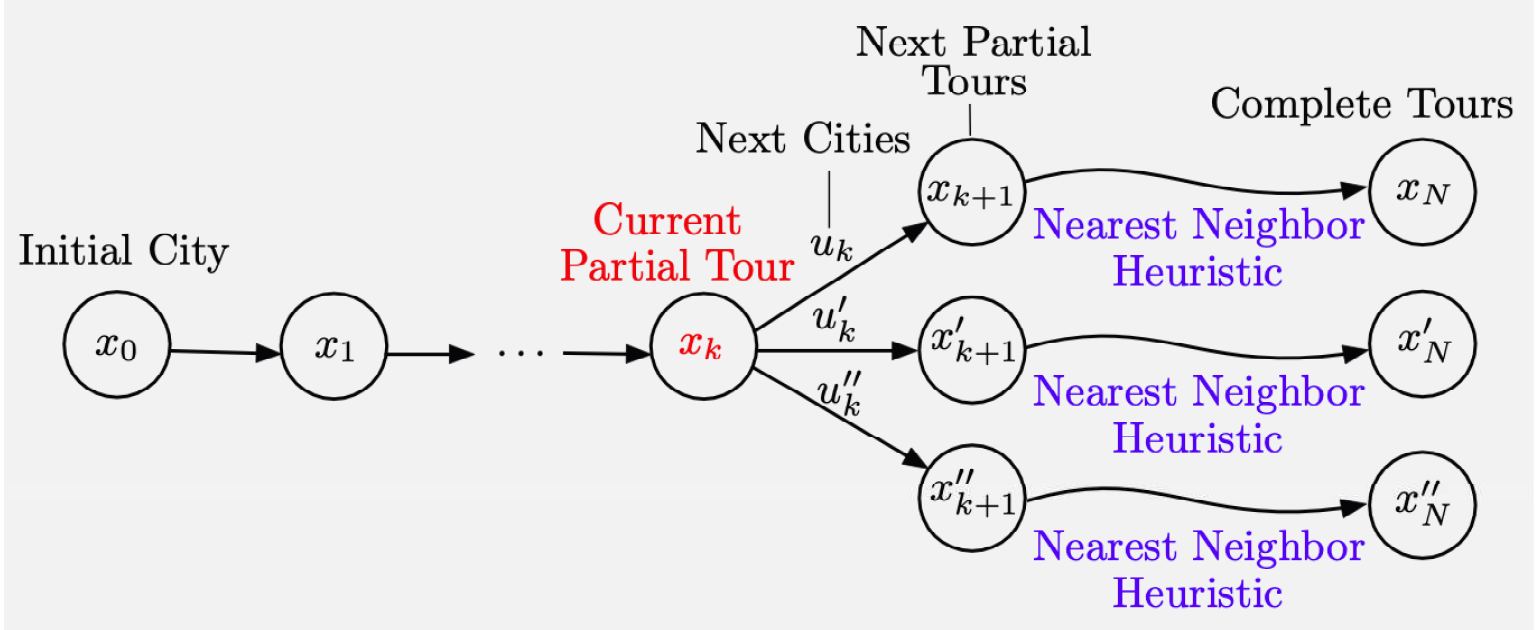


Quelle: Dimitri P. Bertsekas: Lessons from AlphaZero

## Äquivalente Darstellung mit so genannten Q-Values / Q-Factors

In der Literatur wird manchmal 
- der gesamte Wert $g(x_k, u_k) + J\big( f(x_k, u_k ) \big)$ zusammengefasst und 
- **Q-Function**, **Q-Value** oder **Q-Factor** genannt: 

$$Q_k(x_k, u_k) = g(x_k, u_k) + J\big( f(x_k, u_k ) \big)$$

Man kann dann auch das Minimierungsproblem zur Entscheidungsfindung in Schritt/ Stufe $k$ mit Hilfe der Q-Factors formulieren



$$\min_{u_k \in U_k} \Big( Q_k(x_k, u_k) \Big)$$



.. einige Algorithmen aus dem Reinforcement Learning, z.B. das so genannte **Q-Learning** nutzen diese Schreibweise

## Rollout Allgemein: Visualisierung 

<img src="./img/rollout_general.png" width="80%">

Quelle: Dimitri P. Bertsekas: Lessons from AlphaZero

## Rollout für das TSP

**Greedy:**
- wähle immer den nächsten Nachbarn (den Nachbarn mit der kürzesten Distanz)

**Rollout mit Greedy:**
- lasse von jedem Nachbarn aus Greedy laufen
- wähle den Nachbarn, der die **Summe aus Distanz zum Nachbarn und Greedy-Distanz vom Nachbarn bis zum Ende** minimiert

- Formal: 

$$\min_{u_k \in U_k} \Big( g(x_k, u_k) + \tilde{J}\big( f(x_k, u_k )\big)  \Big)$$ 

wobei:
- $U_k$ die Menge der noch nicht besuchten Knoten ist
- $g(x_k, u_k)$ die Distanz vom aktuellen Knoten zum möglichen Nachfolger $u_k$
- $\tilde{J}\big( f(x_k, u_k )\big)$ das Ergebnis der Greedy-Heuristik von $u_k$ aus

## Implementierung der Rollout-Idee in Python
- was müssen wir beachten, damit wir den nearest neighbor-Code für Rollout nutzen können?

## Implementierung der Rollout-Idee in Python
- die Auswahl des Knotens:

In [88]:
@njit
def select_using_rollout_nn(tour, distance_matrix):
    
    node = tour[len(tour)-1] 
    best_estimated_value = 1000000
    best_node = node        
        
    for next_node in range(len(distance_matrix)):
        if next_node in tour: 
            continue            
        # _, heißt, dass wir den ersten Rückgabewert ignorieren
        
        # Berechne die NN-Länge der Rest-Tour von next_node aus
        _, nn_value = tsp_nearest_neighbor(distance_matrix, tour + [next_node])
        
                         # g(x_k, u_k)                    + J~ (f(x_k, u_k))
        estimated_value = distance_matrix[node,next_node] + nn_value

        if estimated_value < best_estimated_value:
            best_node = next_node
            best_estimated_value = estimated_value

    
   
    return best_node, distance_matrix[node,best_node]


## Die Hauptfunktion:

In [89]:
@njit
def tsp_rollout_nn(distance_matrix, tour):
        
    total_distance = 0
    
    #solange die sequenz noch nicht alle Knoten umfasst
    while len(tour) < len(distance_matrix):    
        
        next_node, distance = select_using_rollout_nn(tour, distance_matrix)
        tour.append(next_node)
        total_distance += distance     
        
    total_distance += distance_matrix[tour[len(tour)-1],tour[0]]
    return tour, total_distance

..probieren wir es wieder aus:

In [95]:
%%time
tour_rollout_nn, distance_rollout_nn = tsp_rollout_nn(distance_matrix, [0])
print_obj_and_eval_tsp_solution(distance_matrix, tour_rollout_nn, distance_rollout_nn)



Solution feasible, distance is:  8042
CPU times: total: 31.2 ms
Wall time: 29.3 ms


## Die Vorteile der Rollout-Idee

- sobald man ein Greedy-Verfahren hat, kann man es mit Hilfe des Greedy-Verfahrens selbst stark verbessern
- das Verfahren funktioniert nicht nur für TSP, sondern auch für andere Problemstellungen
- das Verfahren ist Kombinierbar mit anderen Techniken, z.B.
  - Multistart-Greedy
  - Baumsuchverfahren



## Übung: Multistart Rollout


><div class="alert alert-block alert-info">
<b>Implementieren Sie eine Multistart-Rollout-Funktion! </b></div>  

In [1]:

def multi_start_rollout(distance_matrix):

      

    return 

In [97]:
%%time

tour, distance = multi_start_rollout(distance_matrix)
print_obj_and_eval_tsp_solution(distance_matrix,tour, distance)

Solution feasible, distance is:  7819
CPU times: total: 1.56 s
Wall time: 1.56 s


## Ansatz  zur Beschleunigung: Simplified Rollout

**Kernidee:** Führe Rollout nicht für alle möglichen Entscheidungen aus
- beim TSP: nicht für jeden möglichen nächsten Knoten

**Einfacher Ansatz:** Nutze die Greedy-Funktion zur Auswahl
- für das TSP: nimm nur die $n$ nächsten Nachbarn
- der dazu sortieren wir einfach in jedem Schritt die Nachbarn aufsteigend nach Distanz 
  - und brechen ab, sobald $n$ Nachbarn untersucht wurden


In [106]:
@njit
def select_using_simplified_rollout_nn(distance_matrix, tour,  max_number_of_neighbors_rollout):
    
    node = tour[len(tour)-1] 
                                    
    best_estimated_value = 1000000
    best_node = node  
   
    sorted_neighbors = np.argsort(distance_matrix[node])
    
    number_of_neighbors_rollout = 0
    for next_node in sorted_neighbors:
        if next_node in tour: 
            continue              
        
        number_of_neighbors_rollout += 1
        
        # zähler wenn 
        if number_of_neighbors_rollout > max_number_of_neighbors_rollout:
            break     
                                    
                
        _, nn_value = tsp_nearest_neighbor(distance_matrix, tour + [next_node])
        
        estimated_value = distance_matrix[node,next_node] + nn_value

        if estimated_value < best_estimated_value:
            best_node = next_node
            best_estimated_value = estimated_value

    return best_node, distance_matrix[node,best_node]



## Die Hauptfunktion:

In [107]:
@njit
def tsp_simplified_rollout_nn(distance_matrix, tour, max_number_of_neighbors_rollout):
        
    total_distance = 0
    
    #solange die sequenz noch nicht alle Knoten umfasst
    while len(tour) < len(distance_matrix):    
        
        next_node, distance = select_using_simplified_rollout_nn(distance_matrix, tour, max_number_of_neighbors_rollout)
        tour.append(next_node)
        total_distance += distance     
        
    total_distance += distance_matrix[tour[len(tour)-1],tour[0]]
    return tour, total_distance

..probieren wir es wieder aus:

In [110]:
%%time
max_number_of_neighbors = 5
tour_simplified_rollout_nn, distance_simplified_rollout_nn = tsp_simplified_rollout_nn(distance_matrix, [0], max_number_of_neighbors)
print_obj_and_eval_tsp_solution(distance_matrix, tour_simplified_rollout_nn, distance_simplified_rollout_nn)



Solution feasible, distance is:  8101
CPU times: total: 15.6 ms
Wall time: 15.5 ms
